In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Perceptron Class

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size)  # Initialize weights randomly
        self.bias = np.random.rand()  # Initialize bias randomly
        self.lr = learning_rate

    def activation(self, x):
        # Step function (binary output)
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        # Weighted sum (dot product of inputs and weights + bias)
        total_input = np.dot(inputs, self.weights) + self.bias
        return self.activation(total_input)

    def train(self, X, y, epochs=10):
        for epoch in range(epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                # Update weights and bias using perceptron learning rule
                self.weights += self.lr * error * inputs
                self.bias += self.lr * error
                print(f"Epoch {epoch+1}/{epochs} - Weights: {self.weights}, Bias: {self.bias}")
                print(f"Input: {inputs}, Predicted: {prediction}, Actual: {label}")




# Define dataset for each gate

# AND Gate Dataset


In [ ]:
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])


# OR Gate Dataset


In [ ]:
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])


# AND-NOT Gate Dataset (first input AND NOT second input)


In [ ]:
X_and_not = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and_not = np.array([0, 0, 1, 0])


# XOR Gate Dataset


In [ ]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])


# Plot decision boundary


In [ ]:
def plot_decision_boundary(perceptron, X, y, gate_name):
    # Create a grid of points
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Calculate predictions for each point in the grid
    Z = np.array([perceptron.predict(np.array([x1, x2])) for x1, x2 in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.6, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', cmap=plt.cm.RdYlBu)

    plt.title(f"{gate_name} Gate Decision Boundary")
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.show()


# Train and test Perceptron for each gate


In [ ]:
def test_perceptron(X, y, gate_name, epochs=10):
    perceptron = Perceptron(input_size=2)
    perceptron.train(X, y, epochs=epochs)

    # Visualize decision boundary
    plot_decision_boundary(perceptron, X, y, gate_name)

    print(f"\nTesting {gate_name} Gate Perceptron")
    for inputs in X:
        print(f"Input: {inputs}, Predicted Output: {perceptron.predict(inputs)}")
    print("\n")

# AND Gate Classification


### AND Gate Classification ###


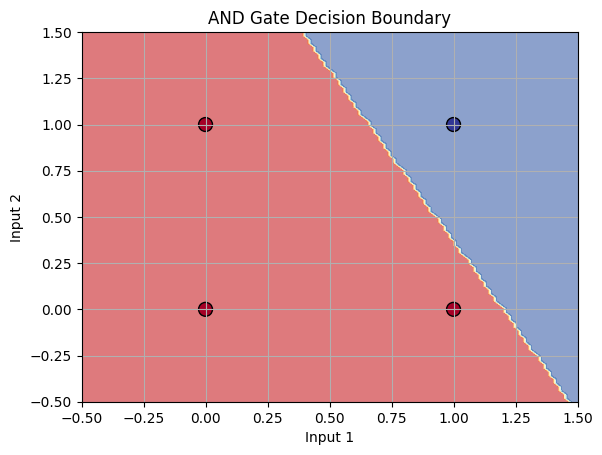


Testing AND Gate Perceptron
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1




In [ ]:
print("### AND Gate Classification ###")
test_perceptron(X_and, y_and, "AND", epochs=10)

Question-
1.How do the weights and bias values change during training for the AND gate?

Answere-
During the training of the perceptron for the AND gate, the weights and bias are adjusted incrementally based on the perceptron's prediction error for each input combination. Initially, the weights and bias are randomly initialized. For each input, if the perceptron's prediction differs from the actual output, the weights are updated using the perceptron learning rule: weight += learning_rate * error * input, and the bias is updated similarly with bias += learning_rate * error. Over multiple epochs, the weights gradually converge to values that correctly classify the AND gate, ensuring that only the input [1, 1] produces an output of 1 while all other combinations result in 0.

Question-
2.Can the perceptron successfully learn the AND logic with a linear decision boundary?

Answere-
Yes, the perceptron can successfully learn the AND logic with a linear decision boundary. Since the AND gate is linearly separable, the perceptron is able to adjust its weights and bias through training to create a clear boundary that separates the input combination [1, 1] (which outputs 1) from the other inputs (which output 0). The linear decision boundary divides the input space in a way that correctly classifies the outputs of the AND gate, as shown in the visual representation after training.

# OR Gate Classification


### OR Gate Classification ###


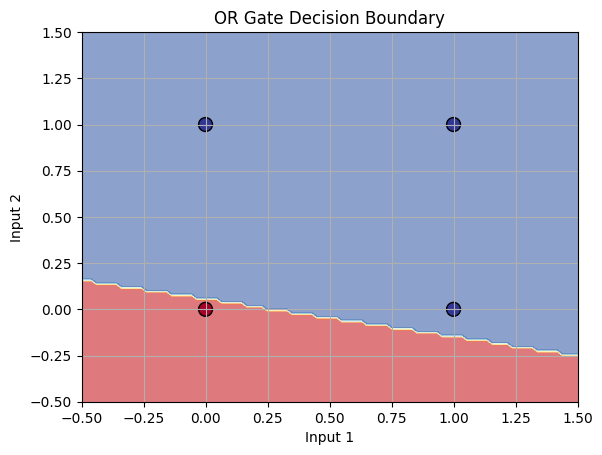


Testing OR Gate Perceptron
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 1




In [ ]:
print("### OR Gate Classification ###")
test_perceptron(X_or, y_or, "OR", epochs=10)


Question-
1.What changes in the perceptron's weights are necessary to represent the OR gate logic?

Answere-
To represent the OR gate logic, the perceptron's weights need to be adjusted so that the decision boundary correctly classifies the output of the OR gate. Specifically, the weights and bias should be set such that any input where at least one of the inputs is 1 results in an output of 1. This requires the weights to be positive and the bias to be appropriately adjusted to ensure that the perceptron activates (outputs 1) for input combinations [0, 1], [1, 0], and [1, 1], while producing 0 only for the input [0, 0]. The final weight configuration will have a decision boundary that ensures the correct classification of all input combinations according to the OR gate logic.

Question-
2.How does the linear decision boundary look for the OR gate classification?

Answere-
For the OR gate classification, the linear decision boundary appears as a line that separates the input space such that any point on one side of the line corresponds to an output of 1, and any point on the other side corresponds to an output of 0. Specifically, the boundary will be positioned such that all inputs with at least one 1 (i.e., [0, 1], [1, 0], and [1, 1]) fall on the 1 side of the boundary, while the input [0, 0] falls on the 0 side. This line will slope in a way that captures the linear separability of the OR gate's outputs.

# AND-NOT Gate Classification


### AND-NOT Gate Classification ###


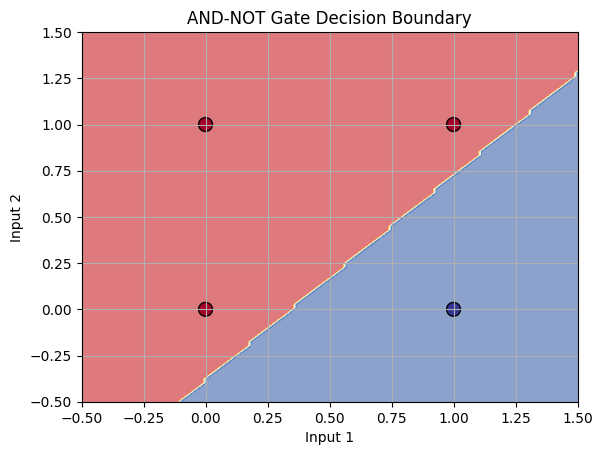


Testing AND-NOT Gate Perceptron
Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 1
Input: [1 1], Predicted Output: 0




In [ ]:
print("### AND-NOT Gate Classification ###")
test_perceptron(X_and_not, y_and_not, "AND-NOT", epochs=10)


Question-
1.What is the perceptron's weight configuration after training for the AND-NOT gate?

Answere-
After training for the AND-NOT gate, the perceptron's weight configuration will adjust to correctly classify the output where the gate produces 1 only for the input [1, 0] and 0 for the other combinations. The weights will be set such that the weighted sum of inputs plus the bias correctly distinguishes [1, 0] as 1, while [0, 0], [0, 1], and [1, 1] are classified as 0. Typically, the weight for the first input will be positive and greater than zero, while the weight for the second input will be non-positive, with a bias set to ensure the perceptron activates only for [1, 0].

Question-
2.How does the perceptron handle cases where both inputs are 1 or 0?

Answere-
In the case of the AND-NOT gate, the perceptron handles the input combinations [1, 1] and [0, 0] by classifying them as 0, because these inputs do not satisfy the condition where the first input is 1 and the second input is 0. Specifically, for [1, 1], the perceptron will output 0 as the combination does not meet the AND-NOT condition. Similarly, for [0, 0], the output is 0 because the first input is not 1. Thus, the perceptron's weights and bias are adjusted to ensure these cases are correctly identified as 0, in line with the expected behavior of the AND-NOT gate.

# XOR Gate Classification (Will fail for XOR, as XOR is not linearly separable)


### XOR Gate Classification ###


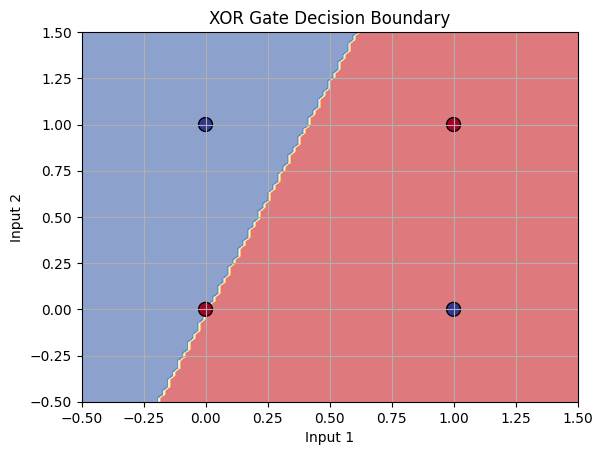


Testing XOR Gate Perceptron
Input: [0 0], Predicted Output: 1
Input: [0 1], Predicted Output: 1
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 0




In [ ]:
print("### XOR Gate Classification ###")
test_perceptron(X_xor, y_xor, "XOR", epochs=10)

Question-
1.Why does the Single Layer Perceptron struggle to classify the XOR gate?

Answere-
The Single Layer Perceptron struggles to classify the XOR gate because XOR is not linearly separable; there is no single straight line that can separate the input combinations [0, 0] and [1, 1] (which output 0) from [0, 1] and [1, 0] (which output 1). The perceptron's linear decision boundary is inadequate to capture this non-linear relationship, resulting in incorrect classifications for the XOR gate. This limitation arises because a single layer perceptron can only solve problems that are linearly separable, while XOR requires a more complex decision surface that a single perceptron cannot model.

Question-
2.What modifications can be made to the neural network model to handle the XOR gate correctly?

Answere-
To handle the XOR gate correctly, modifications to the neural network model are needed to accommodate non-linearly separable data. One effective approach is to use a Multi-Layer Perceptron (MLP) with at least one hidden layer. By introducing hidden layers with non-linear activation functions (such as ReLU or sigmoid), the network can learn complex decision boundaries and capture the XOR function's non-linear patterns. This architecture allows the model to transform the input space into a form where a linear decision boundary can effectively separate the XOR outputs.

**XOR GATE using MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# XOR truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

model = MLPClassifier(hidden_layer_sizes=(4,), activation='logistic', solver='lbfgs', max_iter=5000, random_state=42)

model.fit(X, y)

predictions = model.predict(X)
print(f"Input: {X}")
print(f"XOR Predicted: {predictions}")
print(f"XOR Actual: {y}")

Input: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
XOR Predicted: [0 1 1 0]
XOR Actual: [0 1 1 0]
